## SVM Classifier




 Equation of the Hyperplane:

 #### y = wx - b



### Gradient Descent:-
    is an optimization algorism used for minimizing the
    loss function in various machine learning algorisms.
    it's used for updating the parameters of learning
    model.

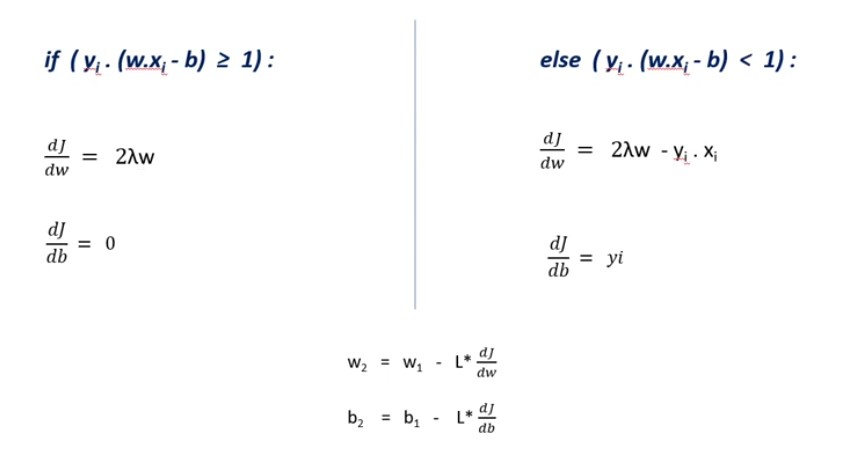

#### w = w - a * dw
#### b = b - a * db

### Learning Rate:-
    is tuning parameter in an optimization algorism that
    determines the step size at each iteration while
    moving toward a minimum of a loss function. 

## Buliding Suppport Vector Machine Classifier

In [1]:
## import dependencies
import numpy as np

class SVMC:
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        
        # initating the parameters (learning rate,number of iterations)
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter
    def fit(self,X,Y):
        
        #number of training examples and number of features
        self.m,self.n = X.shape #number of rows and columns

        #initating the weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.no_of_iterations):
            self.update_width()
    def update_width(self):

        #label encoding
        Y_label = np.where(self.Y <= 0 ,-1,1)

        # Gradients(dw and db)
        for index,x_i in enumerate(self.X): # display evey item in list and itis index 
            condition = Y_label[index] * (np.dot(x_i,self.w) - self.b) >= 1 

        if condition == True :
            dw = 2 * self.lambda_parameter * self.w
            db = 0
        else : 
            dw = 2 * self.lambda_parameter -  np.dot(x_i, Y_label[index])
            db = Y_label[index]
            

            
        #updating the wights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
        
    def predict(self,X):
        output = np.dot(X, self.w) - self.b
        predicted_label = np.sign(output)
        y_hat = np.where(predicted_label <= -1 ,0 ,1)
        return y_hat

## Using logistic regrssion¶


### Importing The Dependencies


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

### Read the data

In [3]:
df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")


### Display first 5 rows

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Display last 5 rows

In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Display random 5 rows

In [6]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
745,12,100,84,33,105,30.0,0.488,46,0
273,1,71,78,50,45,33.2,0.422,21,0
383,1,90,62,18,59,25.1,1.268,25,0
503,7,94,64,25,79,33.3,0.738,41,0
164,0,131,88,0,0,31.6,0.743,32,1


### Display number of columns and rows

In [7]:
print("The Shape of DataFrame is: ",df.shape)

The Shape of DataFrame is:  (768, 9)


### some statistical measures

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
df.groupby("Outcome").std()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.017185,26.141200,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655
1,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254


In [11]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

1 => Diabetes


0 => Non-Diabetes

<Axes: xlabel='Outcome', ylabel='count'>

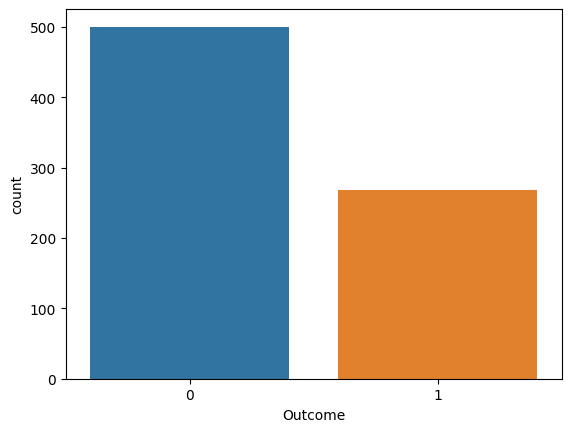

In [12]:
sns.countplot(x='Outcome',data=df)

In [13]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [14]:
df.kurt()


Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

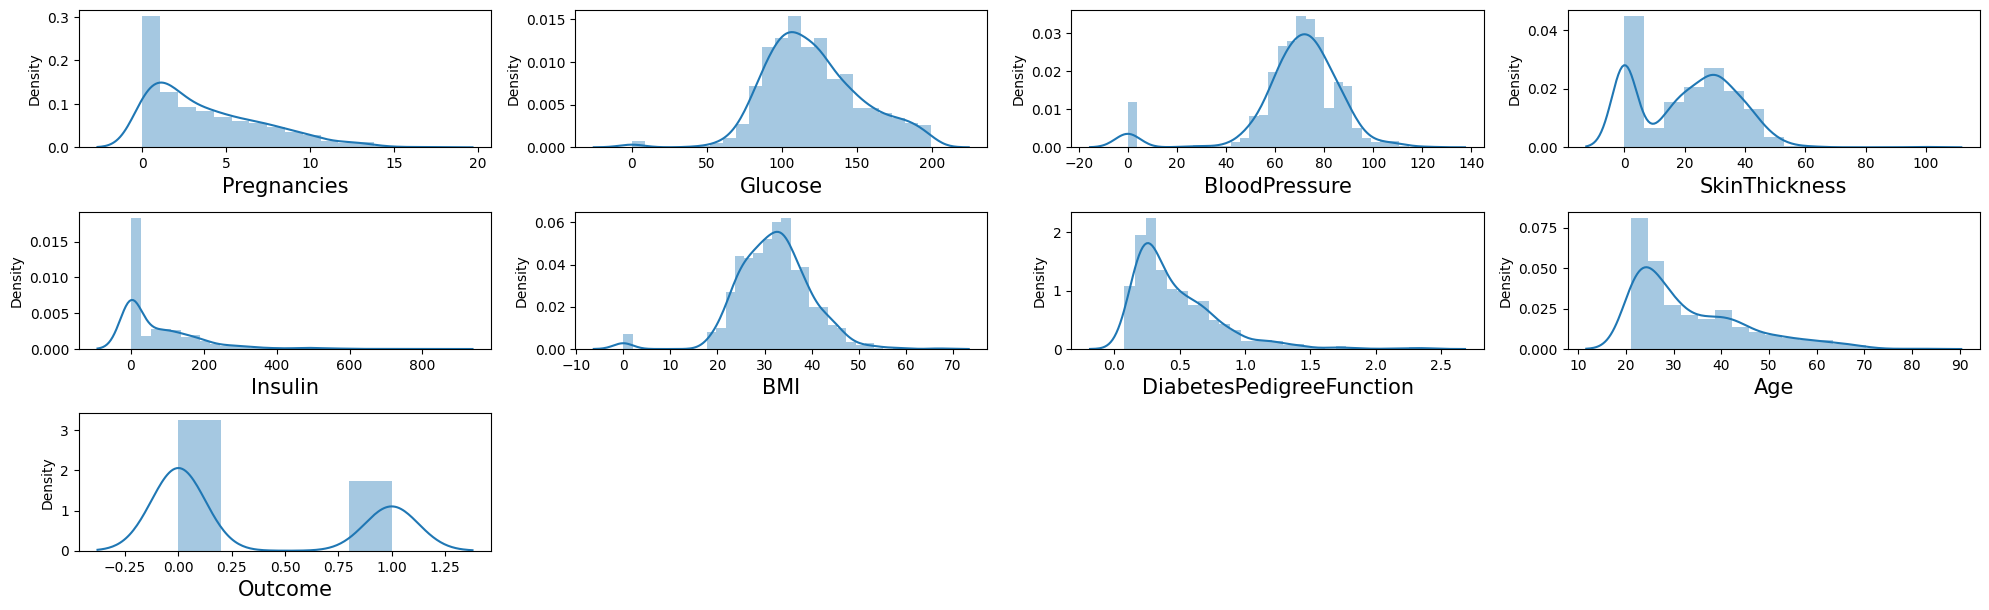

In [15]:
plt.figure(figsize=(20,40))
plotnum = 1
for columns in df:
    if plotnum <= len(df.columns) :
        ax=plt.subplot(20,4,plotnum)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=15)
    plotnum += 1
plt.tight_layout() 
plt.show()

<Axes: >

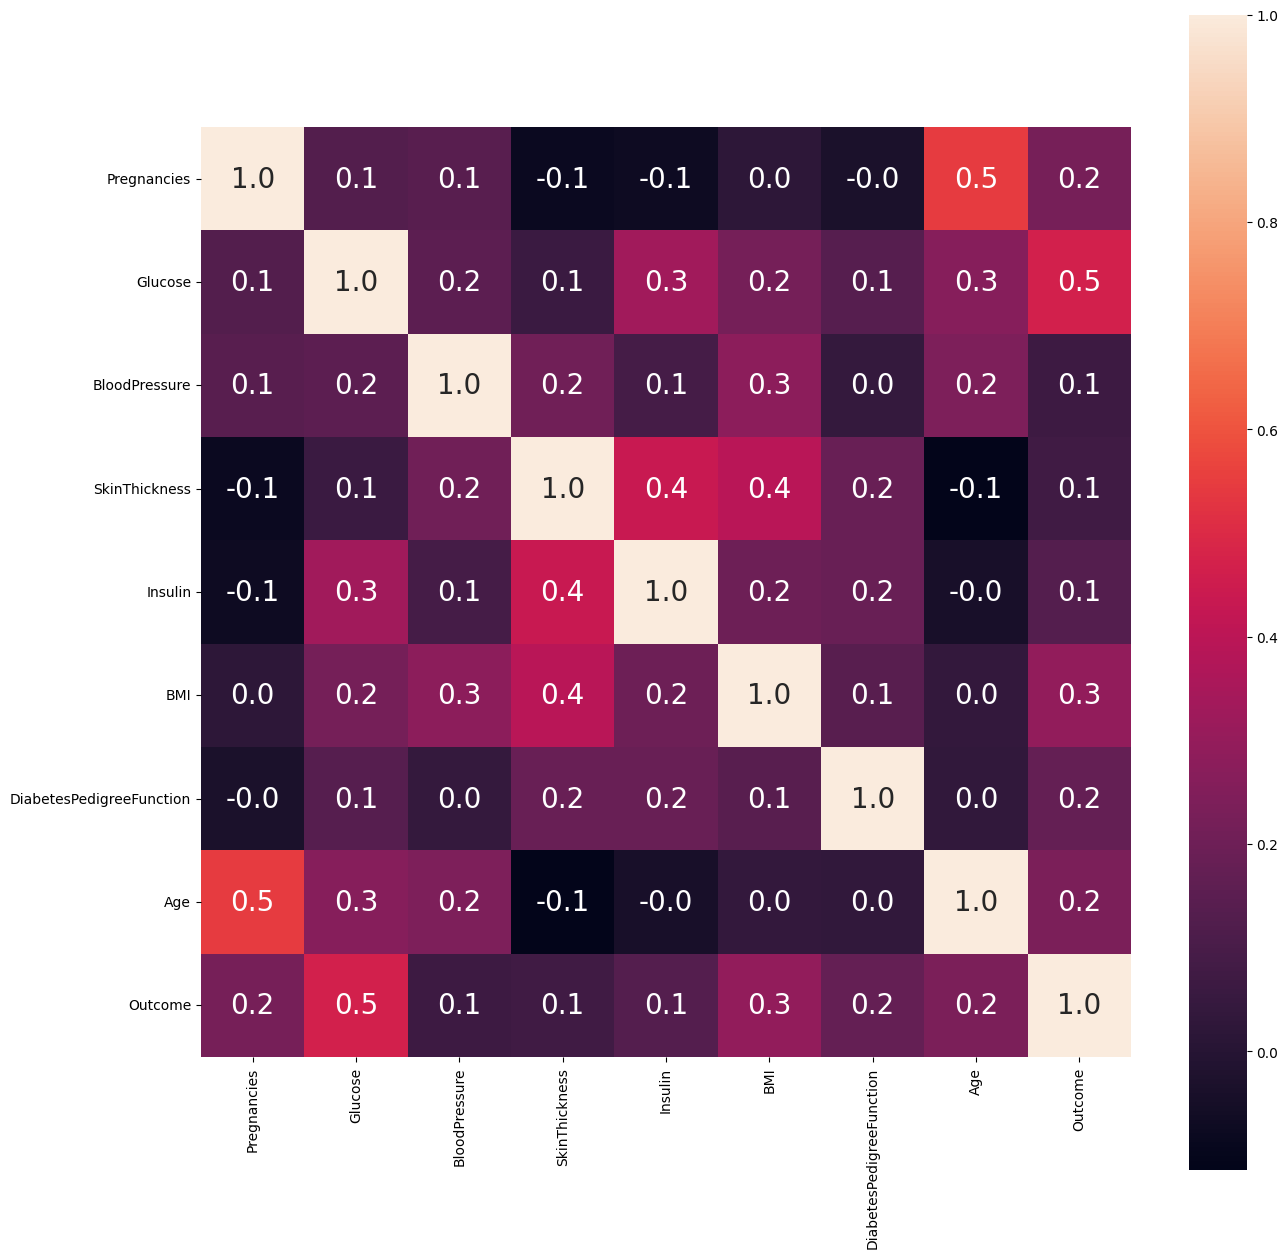

In [16]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,fmt='.1f',cbar=True,square=True,annot=True,annot_kws={'size':20})

### show some informations about dataframe

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
print("The Number of Null in DataFrame is: ",df.isnull().sum().sum())
print("The Number of NAN in DataFrame is: ",df.isna().sum().sum())
print("The Number of duplicated in DataFrame is: ",df.duplicated().sum().sum())


The Number of Null in DataFrame is:  0
The Number of NAN in DataFrame is:  0
The Number of duplicated in DataFrame is:  0


### Separating the data

In [19]:
features = df.iloc[:,:-1].values
target = df.iloc[:,-1].values

### Standerized the Data

In [20]:
scaler = StandardScaler()

In [21]:
standerized_features = scaler.fit_transform(features)


In [22]:
standerized_features.std()

1.0

In [23]:
## Train Test split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(standerized_features,target,test_size=0.2,random_state=11,stratify=target)

### Train the Model

In [25]:
model = SVMC(learning_rate=0.0001,no_of_iterations=1000,lambda_parameter=0.01)

In [26]:
model.fit(X_train,Y_train)

In [27]:
Y_train_pred = model.predict(X_train)
score1=accuracy_score(Y_train,Y_train_pred)

print("The Accurcy Score of Trainning Data is :  ", score1)

The Accurcy Score of Trainning Data is :   0.5179153094462541


In [28]:
Y_test_pred = model.predict(X_test)
score2=accuracy_score(Y_test,Y_test_pred)

print("The Accurcy Score of testning Data is :  ", score2)

The Accurcy Score of testning Data is :   0.4675324675324675


### Make Prediction System

In [29]:
input_data=(6,148,72,35,0,33.6,0.627,50)
input_as_array=np.asarray(input_data)
input_reshaped=input_as_array.reshape(1,-1)

prediction =model.predict(input_reshaped)
if prediction == 0:
    prediction = "Non-Diabetes"
else :
    prediction = "Diabetes"

print(f"the Final Prediction Is  : {prediction}")

the Final Prediction Is  : Diabetes


In [30]:
## SVMC by clude AI

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

class SVMC:
    def __init__(self, 
                 C=1.0, 
                 learning_rate=0.01, 
                 max_iter=1000, 
                 tol=1e-4, 
                 kernel='linear',
                 gamma='scale',
                 degree=3,
                 coef0=0.0,
                 random_state=None,
                 verbose=False):
        """
        Support Vector Machine Classifier محسن
        
        Parameters:
        -----------
        C : float, default=1.0
            معامل التنظيم (كلما قل C، زاد التنظيم)
        learning_rate : float, default=0.01
            معدل التعلم
        max_iter : int, default=1000
            أقصى عدد تكرارات
        tol : float, default=1e-4
            حد التسامح للتوقف
        kernel : str, default='linear'
            نوع الـ kernel ('linear', 'rbf', 'poly', 'sigmoid')
        gamma : str or float, default='scale'
            معامل kernel للـ RBF, poly, sigmoid
        degree : int, default=3
            درجة polynomial kernel
        coef0 : float, default=0.0
            مصطلح مستقل في kernel
        random_state : int, default=None
            للتحكم في العشوائية
        verbose : bool, default=False
            لطباعة معلومات التدريب
        """
        self.C = C
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.random_state = random_state
        self.verbose = verbose
        
        # متغيرات داخلية
        self.w = None
        self.b = 0
        self.support_vectors_ = None
        self.support_vector_labels_ = None
        self.n_support_ = None
        self.training_accuracy_ = None
        self.cost_history_ = []
        self.is_fitted_ = False
        
        if random_state is not None:
            np.random.seed(random_state)
    
    def _compute_kernel_matrix(self, X1, X2=None):
        """
        حساب kernel matrix
        """
        if X2 is None:
            X2 = X1
            
        if self.kernel == 'linear':
            return np.dot(X1, X2.T)
        
        elif self.kernel == 'rbf':
            if self.gamma == 'scale':
                gamma = 1.0 / (X1.shape[1] * X1.var())
            else:
                gamma = self.gamma
            
            # حساب المسافة الإقليدية
            sq_dists = np.sum(X1**2, axis=1).reshape(-1, 1) + \
                       np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
            return np.exp(-gamma * sq_dists)
        
        elif self.kernel == 'poly':
            if self.gamma == 'scale':
                gamma = 1.0 / X1.shape[1]
            else:
                gamma = self.gamma
            return (gamma * np.dot(X1, X2.T) + self.coef0) ** self.degree
        
        elif self.kernel == 'sigmoid':
            if self.gamma == 'scale':
                gamma = 1.0 / X1.shape[1]
            else:
                gamma = self.gamma
            return np.tanh(gamma * np.dot(X1, X2.T) + self.coef0)
    
    def _compute_cost(self, X, y):
        """
        حساب دالة التكلفة (Hinge Loss + Regularization)
        """
        if self.kernel == 'linear':
            distances = np.dot(X, self.w) - self.b
        else:
            K = self._compute_kernel_matrix(X, self.X_train)
            distances = np.dot(K, self.alpha * self.y_train) - self.b
        
        # Hinge Loss
        hinge_loss = np.maximum(0, 1 - y * distances)
        
        # إجمالي التكلفة
        if self.kernel == 'linear':
            regularization = 0.5 * np.dot(self.w, self.w)
        else:
            regularization = 0.5 * np.sum(self.alpha**2)
        
        cost = self.C * np.mean(hinge_loss) + regularization
        return cost
    
    def fit(self, X, y):
        """
        تدريب النموذج
        """
        # التحقق من صحة البيانات
        X = np.array(X)
        y = np.array(y)
        
        if X.ndim != 2:
            raise ValueError("X يجب أن يكون مصفوفة ثنائية الأبعاد")
        
        self.n_samples_, self.n_features_ = X.shape
        
        # تحويل التصنيفات إلى -1 و 1
        self.classes_ = np.unique(y)
        if len(self.classes_) != 2:
            raise ValueError("يدعم هذا المصنف التصنيف الثنائي فقط")
        
        y_binary = np.where(y == self.classes_[0], -1, 1)
        
        # حفظ بيانات التدريب
        self.X_train = X.copy()
        self.y_train = y_binary.copy()
        
        if self.kernel == 'linear':
            self._fit_linear(X, y_binary)
        else:
            self._fit_kernel(X, y_binary)

        # النموذج أصبح مدرب الآن
        self.is_fitted_ = True  # ← ضع هذا قبل أي استدعاء لـ predict

        # حساب دقة التدريب
        train_pred = self.predict(X)
        self.training_accuracy_ = accuracy_score(y, train_pred)
    
        # تحديد Support Vectors
        self._find_support_vectors()
        
        self.is_fitted_ = True
        
        if self.verbose:
            print(f"التدريب اكتمل بنجاح!")
            print(f"دقة التدريب: {self.training_accuracy_:.4f}")
            print(f"عدد Support Vectors: {len(self.support_vectors_)}")
        
        return self
    
    def _fit_linear(self, X, y):
        """
        تدريب النموذج الخطي
        """
        # تهيئة المعاملات
        self.w = np.random.normal(0, 0.01, self.n_features_)
        self.b = 0
        
        prev_cost = float('inf')
        
        for iteration in range(self.max_iter):
            # حساب التكلفة
            cost = self._compute_cost(X, y)
            self.cost_history_.append(cost)
            
            # التحقق من التقارب
            if abs(prev_cost - cost) < self.tol:
                if self.verbose:
                    print(f"تقارب في التكرار {iteration}")
                break
            
            prev_cost = cost
            
            # Gradient Descent
            for i in range(self.n_samples_):
                distance = np.dot(X[i], self.w) - self.b
                
                if y[i] * distance >= 1:
                    # نقطة مصنفة بشكل صحيح
                    dw = self.w / self.C
                    db = 0
                else:
                    # نقطة مصنفة بشكل خاطئ أو في الهامش
                    dw = self.w / self.C - y[i] * X[i]
                    db = -y[i]
                
                # تحديث المعاملات
                self.w = self.w - self.learning_rate * dw
                self.b = self.b - self.learning_rate * db
    
    def _fit_kernel(self, X, y):
        """
        تدريب النموذج باستخدام kernel
        """
        # تهيئة معاملات Lagrange
        self.alpha = np.random.uniform(0, self.C, self.n_samples_)
        self.b = 0
        
        # حساب kernel matrix
        K = self._compute_kernel_matrix(X, X)
        
        prev_cost = float('inf')
        
        for iteration in range(self.max_iter):
            # تحديث معاملات alpha (نسخة مبسطة من SMO)
            for i in range(self.n_samples_):
                # حساب الخطأ
                error_i = np.sum(self.alpha * y * K[i, :]) - self.b - y[i]
                
                if (y[i] * error_i < -self.tol and self.alpha[i] < self.C) or \
                   (y[i] * error_i > self.tol and self.alpha[i] > 0):
                    
                    # اختيار j عشوائياً
                    j = np.random.randint(0, self.n_samples_)
                    while j == i:
                        j = np.random.randint(0, self.n_samples_)
                    
                    error_j = np.sum(self.alpha * y * K[j, :]) - self.b - y[j]
                    
                    # حفظ القيم القديمة
                    alpha_i_old = self.alpha[i]
                    alpha_j_old = self.alpha[j]
                    
                    # حساب الحدود
                    if y[i] != y[j]:
                        L = max(0, self.alpha[j] - self.alpha[i])
                        H = min(self.C, self.C + self.alpha[j] - self.alpha[i])
                    else:
                        L = max(0, self.alpha[i] + self.alpha[j] - self.C)
                        H = min(self.C, self.alpha[i] + self.alpha[j])
                    
                    if L == H:
                        continue
                    
                    # حساب eta
                    eta = 2 * K[i, j] - K[i, i] - K[j, j]
                    if eta >= 0:
                        continue
                    
                    # تحديث alpha_j
                    self.alpha[j] = alpha_j_old - (y[j] * (error_i - error_j)) / eta
                    
                    # قص alpha_j
                    self.alpha[j] = max(L, min(H, self.alpha[j]))
                    
                    if abs(self.alpha[j] - alpha_j_old) < 1e-5:
                        continue
                    
                    # تحديث alpha_i
                    self.alpha[i] = alpha_i_old + y[i] * y[j] * (alpha_j_old - self.alpha[j])
                    
                    # تحديث b
                    b1 = self.b - error_i - y[i] * (self.alpha[i] - alpha_i_old) * K[i, i] - \
                         y[j] * (self.alpha[j] - alpha_j_old) * K[i, j]
                    b2 = self.b - error_j - y[i] * (self.alpha[i] - alpha_i_old) * K[i, j] - \
                         y[j] * (self.alpha[j] - alpha_j_old) * K[j, j]
                    
                    if 0 < self.alpha[i] < self.C:
                        self.b = b1
                    elif 0 < self.alpha[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2
            
            # حساب التكلفة
            cost = self._compute_cost(X, y)
            self.cost_history_.append(cost)
            
            if abs(prev_cost - cost) < self.tol:
                if self.verbose:
                    print(f"تقارب في التكرار {iteration}")
                break
            
            prev_cost = cost
    
    def _find_support_vectors(self):
        """
        تحديد Support Vectors
        """
        if self.kernel == 'linear':
            # للـ kernel الخطي، نجد النقاط القريبة من الحدود
            distances = np.abs(np.dot(self.X_train, self.w) - self.b)
            margin = 1.0 / np.linalg.norm(self.w)
            support_mask = distances <= margin * 1.1  # هامش صغير للدقة العددية
        else:
            # للـ kernels الأخرى، النقاط مع alpha > 0
            support_mask = self.alpha > 1e-5
        
        self.support_vectors_ = self.X_train[support_mask]
        self.support_vector_labels_ = self.y_train[support_mask]
        self.n_support_ = [np.sum(self.support_vector_labels_ == -1), 
                          np.sum(self.support_vector_labels_ == 1)]
    
    def predict(self, X):
        """
        التنبؤ بالتصنيفات
        """
        if not self.is_fitted_:
            raise ValueError("يجب تدريب النموذج أولاً")
        
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(1, -1)
        
        decision_values = self.decision_function(X)
        predictions = np.where(decision_values >= 0, self.classes_[1], self.classes_[0])
        
        return predictions
    
    def decision_function(self, X):
        """
        حساب قيم القرار (المسافة من فرط المستوى)
        """
        if not self.is_fitted_:
            raise ValueError("يجب تدريب النموذج أولاً")
        
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(1, -1)
        
        if self.kernel == 'linear':
            return np.dot(X, self.w) - self.b
        else:
            K = self._compute_kernel_matrix(X, self.X_train)
            return np.dot(K, self.alpha * self.y_train) - self.b
    
    def predict_proba(self, X):
        """
        التنبؤ بالاحتماليات (تقريبي)
        """
        decision_values = self.decision_function(X)
        # تحويل تقريبي للاحتماليات باستخدام sigmoid
        probs = 1 / (1 + np.exp(-decision_values))
        return np.column_stack([1 - probs, probs])
    
    def score(self, X, y):
        """
        حساب دقة النموذج
        """
        return accuracy_score(y, self.predict(X))
    
    def plot_decision_boundary(self, X, y, title="SVM Decision Boundary"):
        """
        رسم حدود القرار (للبيانات ثنائية الأبعاد فقط)
        """
        if X.shape[1] != 2:
            raise ValueError("يمكن رسم حدود القرار للبيانات ثنائية الأبعاد فقط")
        
        plt.figure(figsize=(8, 8))
        
        # إنشاء شبكة للرسم
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        
        # التنبؤ على الشبكة
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        Z = self.decision_function(mesh_points)
        Z = Z.reshape(xx.shape)
        
        # رسم حدود القرار
        plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap=plt.cm.RdYlBu)
        plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', linewidths=2)
        
        # رسم النقاط
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
        
        # رسم Support Vectors
        if hasattr(self, 'support_vectors_'):
            plt.scatter(self.support_vectors_[:, 0], self.support_vectors_[:, 1], 
                       s=100, facecolors='none', edgecolors='red', linewidths=2, 
                       label='Support Vectors')
        
        plt.colorbar(scatter)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(title)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    
    def plot_cost_history(self):
        """
        رسم تاريخ التكلفة أثناء التدريب
        """
        plt.figure(figsize=(8, 6))
        plt.plot(self.cost_history_, 'b-', linewidth=2)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Training Cost History')
        plt.grid(True, alpha=0.3)
        plt.show()
    
    def get_params(self, deep=True):
        """
        الحصول على معاملات النموذج
        """
        params = {
            'C': self.C,
            'learning_rate': self.learning_rate,
            'max_iter': self.max_iter,
            'tol': self.tol,
            'kernel': self.kernel,
            'gamma': self.gamma,
            'degree': self.degree,
            'coef0': self.coef0,
            'random_state': self.random_state,
            'verbose': self.verbose
        }
        
        if self.is_fitted_:
            params.update({
                'n_support_vectors': len(self.support_vectors_) if hasattr(self, 'support_vectors_') else 0,
                'training_accuracy': self.training_accuracy_,
                'n_iterations': len(self.cost_history_)
            })
        
        return params
    
    def set_params(self, **parameters):
        """
        تعديل معاملات النموذج
        """
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self



In [32]:
if __name__ == "__main__":
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report
    import warnings

    # تجاهل التحذيرات غير الضرورية
    warnings.filterwarnings("ignore")

    print("=" * 60)
    print("🚀 مثال على استخدام SVM المحسن مع أنواع Kernels مختلفة")
    print("=" * 60)


    # 2. تجربة عدة Kernels
    kernels = ['linear', 'rbf', 'poly']
    
    for kernel in kernels:
        print("=" * 60)
        print(f"🔍 تجربة SVM باستخدام Kernel: {kernel}")
        print("=" * 60)

        try:
            # 3. إنشاء وتدريب النموذج
            svm = SVMC(C=1.0, kernel=kernel, max_iter=1000, verbose=True, random_state=42)
            svm.fit(X_train, y_train)

            # 4. التنبؤ
            y_pred = svm.predict(X_test_scaled)
            accuracy = accuracy_score(y_test, y_pred)

            print(f"\n📈 دقة النموذج على بيانات الاختبار: {accuracy:.4f}")
            print(f"🧠 عدد الـ Support Vectors: {len(svm.support_vectors_)}")

            # 5. تقرير التصنيف
            print("\n📋 تقرير التصنيف:")
            print(classification_report(y_test, y_pred))

            # 6. رسم حدود القرار
            svm.plot_decision_boundary(X_test_scaled, y_test, 
                                       title=f"SVM Decision Boundary ({kernel} Kernel)")

            # 7. رسم تاريخ التكلفة (إن وجد)
            if hasattr(svm, "plot_cost_history"):
                svm.plot_cost_history()

        except Exception as e:
            print(f"\n❌ حدث خطأ أثناء تجربة Kernel = {kernel}: {str(e)}")

    print("\n🏁 ✅ انتهى المثال بنجاح لجميع الـ Kernels.")


🚀 مثال على استخدام SVM المحسن مع أنواع Kernels مختلفة
🔍 تجربة SVM باستخدام Kernel: linear

❌ حدث خطأ أثناء تجربة Kernel = linear: name 'y_train' is not defined
🔍 تجربة SVM باستخدام Kernel: rbf

❌ حدث خطأ أثناء تجربة Kernel = rbf: name 'y_train' is not defined
🔍 تجربة SVM باستخدام Kernel: poly

❌ حدث خطأ أثناء تجربة Kernel = poly: name 'y_train' is not defined

🏁 ✅ انتهى المثال بنجاح لجميع الـ Kernels.


## Thank You

## Made By : Ali Osama¶